In [1]:
pip install fbprophet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
upload = files.upload()

Saving POCM_HISTORICAL.xlsx to POCM_HISTORICAL.xlsx


In [4]:
data=pd.read_excel("POCM_HISTORICAL.xlsx")

In [5]:
#understanding the monthly weekdays count
daily_df = data.groupby(["Checkout_Date"])['Order_Quantity'].sum().reset_index()
daily_df

,Checkout_Date,Order_Quantity
0,2018-12-04,2
1,2018-12-05,79
2,2018-12-06,422
3,2018-12-07,468
4,2018-12-08,111
...,...,...
465,2020-05-11,2749
466,2020-05-12,3366
467,2020-05-13,1491
468,2020-05-14,6631


In [6]:
daily_df['Order_Quantity'] = np.log(daily_df['Order_Quantity'])

In [7]:
daily_df.columns = ['ds','y']
daily_df.head()

,ds,y
0,2018-12-04,0.693147
1,2018-12-05,4.369448
2,2018-12-06,6.045005
3,2018-12-07,6.148468
4,2018-12-08,4.709530


In [8]:
# (getting the test values and train values)
train = daily_df.iloc[:459]
test = daily_df.iloc[459:]



In [9]:
train 

,ds,y
0,2018-12-04,0.693147
1,2018-12-05,4.369448
2,2018-12-06,6.045005
3,2018-12-07,6.148468
4,2018-12-08,4.709530
...,...,...
454,2020-04-26,0.693147
455,2020-04-27,5.135798
456,2020-04-28,4.356709
457,2020-04-29,4.744932


In [10]:
test

,ds,y
459,2020-05-01,7.315218
460,2020-05-04,6.519147
461,2020-05-05,6.777647
462,2020-05-06,6.820016
463,2020-05-07,6.716595
464,2020-05-08,6.480045
465,2020-05-11,7.918992
466,2020-05-12,8.121480
467,2020-05-13,7.307202
468,2020-05-14,8.799511


In [11]:
# for Fbprophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet

In [12]:
# Train the model
m = Prophet(interval_width=0.95, daily_seasonality=True)
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [13]:
#predictios
future = m.make_future_dataframe(periods=15,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-04,1.618831,4.133695,9.497073,1.618831,1.618831,5.067894,5.067894,5.067894,3.707091,3.707091,3.707091,1.360804,1.360804,1.360804,0.0,0.0,0.0,6.686725
1,2018-12-05,1.626106,3.748969,9.169837,1.626106,1.626106,4.892591,4.892591,4.892591,3.707091,3.707091,3.707091,1.185501,1.185501,1.185501,0.0,0.0,0.0,6.518698
2,2018-12-06,1.633382,4.078722,9.422069,1.633382,1.633382,5.175541,5.175541,5.175541,3.707091,3.707091,3.707091,1.468451,1.468451,1.468451,0.0,0.0,0.0,6.808923
3,2018-12-07,1.640657,4.004649,9.445275,1.640657,1.640657,4.950302,4.950302,4.950302,3.707091,3.707091,3.707091,1.243211,1.243211,1.243211,0.0,0.0,0.0,6.590959
4,2018-12-08,1.647933,-0.313193,5.407269,1.647933,1.647933,0.838021,0.838021,0.838021,3.707091,3.707091,3.707091,-2.869070,-2.869070,-2.869070,0.0,0.0,0.0,2.485954


In [16]:
pred_prohet = forecast.loc[forecast["ds"]>"2020-04-30", ["ds","yhat"]]
pred_prohet

,ds,yhat
459,2020-05-01,6.558213
460,2020-05-02,2.442901
461,2020-05-03,1.830470
462,2020-05-04,6.395484
463,2020-05-05,6.663684
464,2020-05-06,6.485351
465,2020-05-07,6.765271
466,2020-05-08,6.537001
467,2020-05-09,2.421690
468,2020-05-10,1.809259


In [17]:
pred_prohet.drop([460,461,467,468], inplace=True)
pred_prohet.set_index("ds", inplace=True)
pred_prohet

,yhat
ds,
2020-05-01,6.558213
2020-05-04,6.395484
2020-05-05,6.663684
2020-05-06,6.485351
2020-05-07,6.765271
2020-05-08,6.537001
2020-05-11,6.374273
2020-05-12,6.642473
2020-05-13,6.464140


In [18]:
test.set_index("ds", inplace=True)
test

,y
ds,
2020-05-01,7.315218
2020-05-04,6.519147
2020-05-05,6.777647
2020-05-06,6.820016
2020-05-07,6.716595
2020-05-08,6.480045
2020-05-11,7.918992
2020-05-12,8.121480
2020-05-13,7.307202


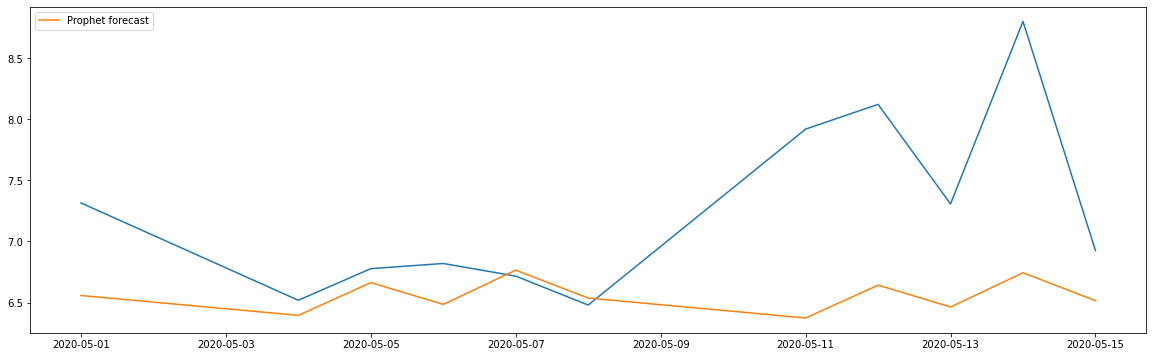

In [27]:
plt.figure(figsize=(20,6))
plt.plot(test['y'])
plt.plot(pred_prohet['yhat'], label="Prophet forecast")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_prohet['yhat'],test['y']))
print(rmse)

0.9721649782235108


In [32]:
up = files.upload()

Saving prediction.csv to prediction.csv


In [33]:

predfile = pd.read_csv("prediction.csv")


In [34]:
predfile["Fbprophet"] = [i for i in pred_prohet["yhat"]]
predfile

,Order_Quantity,Predictions_LSTM,Holt winter,Holt LInear,Holt Linear,SES,SARIMA,ARIMA,Fbprophet
0,7.315218,6.555352,6.071127,6.060471,6.060471,6.224786,5.128177,4.979602,6.558213
1,6.519147,6.559780,6.164114,6.331979,6.331979,6.224786,5.704007,4.326722,6.395484
2,6.777647,6.292999,6.363067,6.603487,6.603487,6.224786,6.038896,5.281134,6.663684
3,6.820016,4.515799,5.937862,6.874996,6.874996,6.224786,5.922167,6.059067,6.485351
4,6.716595,4.899715,5.588505,7.146504,7.146504,6.224786,5.563491,6.647258,6.765271
5,6.480045,6.542017,5.467288,7.418012,7.418012,6.224786,5.498519,6.793672,6.537001
6,7.918992,6.040584,5.988606,7.689520,7.689520,6.224786,4.995570,6.100505,6.374273
7,8.121480,6.377123,5.892709,7.961028,7.961028,6.224786,5.923701,5.307380,6.642473
8,7.307202,6.629075,6.061132,8.232536,8.232536,6.224786,6.145222,5.283868,6.464140
9,8.799511,5.990261,6.154119,8.504045,8.504045,6.224786,6.395692,5.935886,6.744059


In [37]:
predfile.to_csv("prediction3.csv")
files.download("prediction3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>